# Final Submission - Image Classification

---
### My Identity
- Name : Robiul Awal
- ID Dicoding : robiul_awal
- Domicile : Yogyakarta
- Email : robbyulawal11@gmail.com
- Linkedin : https://www.linkedin.com/in/robiul-awal11/

---

# **Classification of Money Plant Disease Images**

## **Objective:**   
Building a model using CNN that can classifymoney plant diseases using medical images of the crop money plant.

## **Sumber Dataset**
https://www.kaggle.com/datasets/mdhasanahmad/diseaseclassifier-money-plant-dataset

## **About Dataset**
Welcome to the Money Plant Disease Classification Dataset! This dataset is a comprehensive collection of images depicting various health states of money plant leaves, primarily focusing on two prevalent diseases: Bacterial Wilt Disease and Manganese Toxicity. Additionally, we have included a folder containing images of healthy money plant leaves for comparison.

This dataset is meticulously curated from various sources and captured using cameras, ensuring a diverse and representative sample set. Each disease category is organized into its respective folder, allowing for easy navigation and analysis. The "Bacterial wilt disease" folder contains images showcasing symptoms of bacterial wilt disease, while the "Manganese Toxicity" folder features instances of manganese toxicity in money plant leaves. The "Healthy" folder comprises images of unaffected and healthy money plant leaves.

In total, this dataset consists of 15,000 images, with each disease category containing 5,000 images. Researchers, data enthusiasts, and machine learning practitioners can leverage this dataset for tasks such as disease classification, image recognition, and agricultural research. By utilizing this dataset, users can develop and train robust machine learning models to accurately classify different health states of money plant leaves, aiding in early disease detection and crop management.

We encourage collaboration and further exploration of this dataset to advance our understanding of money plant diseases and contribute to sustainable agriculture practices. Join us in our mission to create impactful solutions for the agricultural sector using this comprehensive Money Plant Disease Classification Dataset.
Start exploring and innovating today!

# **Import Libraries**

In [1]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil, torch
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import json
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [36]:
print(tf.__version__)

2.15.0


# **Data Loading**

In [4]:
!rm -rf money_plant_dataset/

In [5]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mdhasanahmad/diseaseclassifier-money-plant-dataset
!unzip diseaseclassifier-money-plant-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Main Dataset/Manganese Toxicity/Manganese_Toxicityt_disease_downscaled_original_IMG20230505172751 - Copy.jpg_02c88e32-4236-4fdb-9b67-7f5df3105573.jpg  
  inflating: Main Dataset/Manganese Toxicity/Manganese_Toxicityt_disease_downscaled_original_IMG20230505172751 - Copy.jpg_05385581-b843-4048-ad1f-a010f1f4bb37.jpg  
  inflating: Main Dataset/Manganese Toxicity/Manganese_Toxicityt_disease_downscaled_original_IMG20230505172751 - Copy.jpg_0a58e649-58bb-40db-b83a-6970f1951984.jpg  
  inflating: Main Dataset/Manganese Toxicity/Manganese_Toxicityt_disease_downscaled_original_IMG20230505172751 - Copy.jpg_0ca70af3-0d2a-43a0-aba4-781cc42cef7b.jpg  
  inflating: Main Dataset/Manganese Toxicity/Manganese_Toxicityt_disease_downscaled_original_IMG20230505172751 - Copy.jpg_103aef1b-d405-441d-9ec6-7cdb94039a96.jpg  
  inflating: Main Dataset/Manganese Toxicity/Manganese_Toxicityt_disease_downscaled_original_IMG20230505172751 - Copy.jpg_11

## **Plot gambar sampel untuk semua kelas**

In [6]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
lung_image = {}

# Tentukan path sumber train
path = "Main Dataset/"
for i in os.listdir(path):
    lung_image[i] = os.listdir(os.path.join(path, i))
    print(i)
print(lung_image)

Manganese Toxicity
Healthy
Bacterial wilt disease
{'Manganese Toxicity': ['Manganese_Toxicityt_disease_downscaled_original_IMG20230505173336 - Copy.jpg_96433ea2-6eb2-4534-a5f3-8919b5423fe6.jpg', 'Manganese_Toxicityt_disease_downscaled_original_IMG_20230505_114905.jpg_9ca9cd48-a95a-4e85-8eac-520200807da8.jpg', 'Manganese_Toxicityt_disease_downscaled_original_IMG20230505173418.jpg_a1654d26-e17c-483e-a543-72a543ad0c14.jpg', 'Manganese_Toxicityt_disease_downscaled_original_IMG20230505172854.jpg_5f6bc43d-7cfc-4a83-a3b0-443f6a8db70d.jpg', 'Manganese_Toxicityt_disease_downscaled_original_IMG_20230516_233107 - Copy.jpg_accb9d4a-da53-4b54-a5cc-788aa8701dc2.jpg', 'Manganese_Toxicityt_disease_downscaled_original_IMG_20230505_114900.jpg_d622ae77-7641-42be-a24c-865555645a24.jpg', 'Manganese_Toxicityt_disease_downscaled_original_IMG20230505173329.jpg_06d97abf-065e-4427-a5a3-a44384416325.jpg', 'Manganese_Toxicityt_disease_downscaled_original_IMG_20230809_160845.jpg_10e78ac1-7cf9-4d7c-9e8d-9e3ae206c86

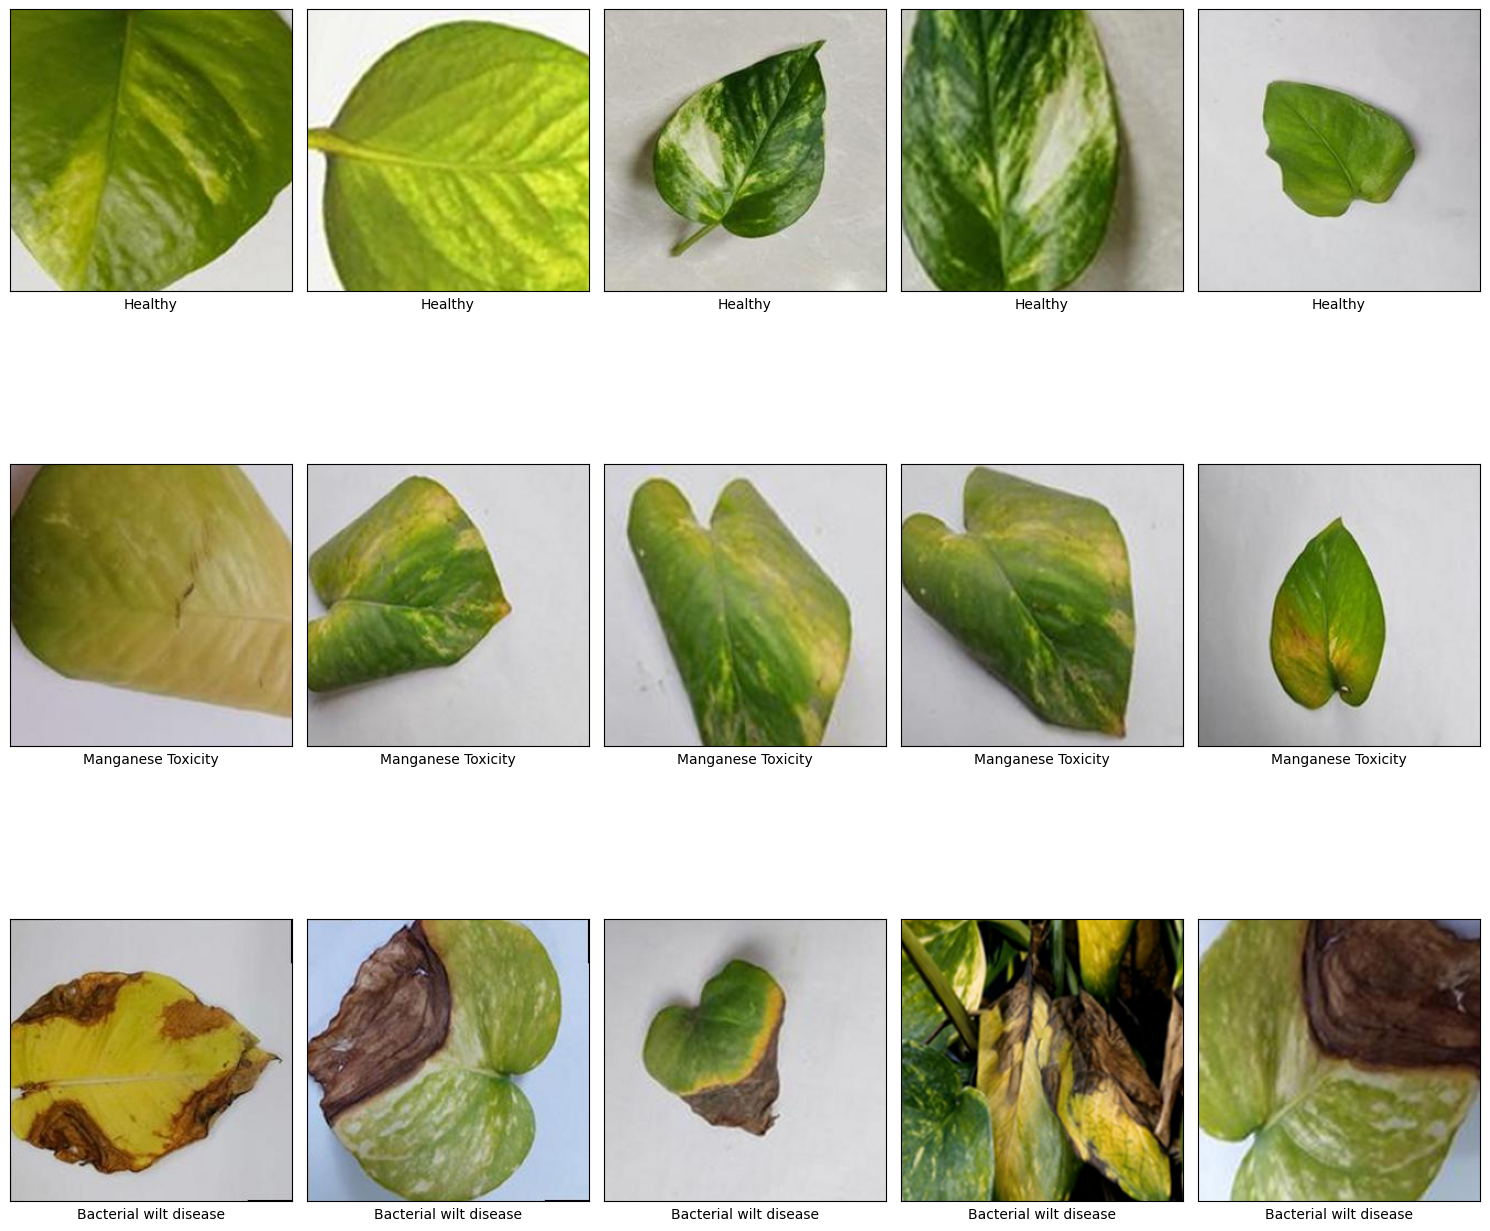

In [ ]:
# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali.
path_sub = "Main Dataset"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(lung_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
  if lung_image[class_name]:
    images = np.random.choice(lung_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)  # Konversi menjadi skala keabuan
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()

## **Plot distribusi gambar di seluruh kelas**

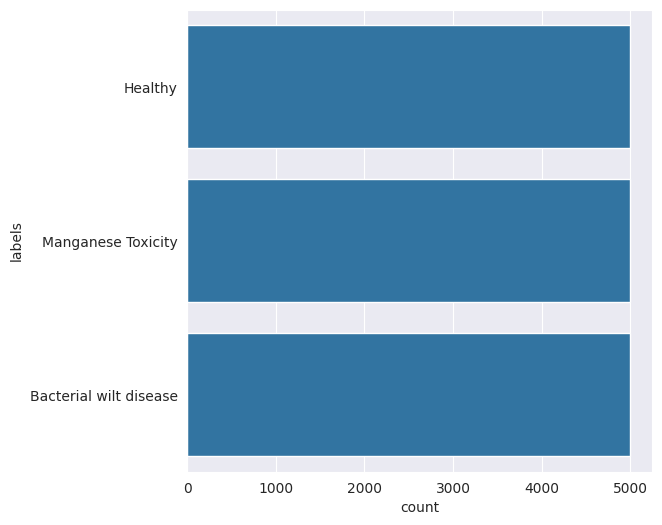

In [ ]:
# Define source path
lung_path = "Main Dataset/"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

# **Data Augmentation**

Image augmentation is a technique used to create new variations of each image in a dataset, so that the model has more variations to learn from. This helps prevent overfitting, where the model gets too used to the training data and cannot generalize well to new data.

Here are some image augmentation strategies that we can apply:

- `anticlockwise_rotation` is when the image is rotated counterclockwise.
- `clockwise_rotation` is when the image is rotated clockwise.
- `flip_up_down` is when the image is flipped vertically from top to bottom.
- `sheared` is when the image is given a random shift effect.
- `blur` is when the image is given a blurry or blurred effect.
- `wrap_shift` is when the image is given a curved shift effect.
- `brightness` is when the image is given a brightness increase effect.

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.flip_up_down(img)
    return img

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.adjust_brightness(img, delta=random.uniform(0.1, 0.5))  # Sesuaikan nilai delta sesuai kebutuhan
    return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.random_blur(img, (3, 3))  # Ukuran kernel blur bisa disesuaikan
    return img

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter shearing range
    datagen = ImageDataGenerator(shear_range=0.2)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter width_shift_range dan height_shift_range
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

In [8]:
from PIL import Image
import os
import random

# Path ke direktori utama yang berisi subfolder dengan gambar-gambar
main_directory = "Main Dataset"
output_main_directory = "resized_dataset"

# Daftar resolusi baru yang ingin diterapkan
resolutions = [
    (640, 480),
    (800, 600),
    (1024, 768),
    (1280, 720),
    (1920, 1080)
]

# Loop melalui setiap folder di dalam direktori utama
for folder_name in os.listdir(main_directory):
    input_folder = os.path.join(main_directory, folder_name)

    # Hanya proses jika path adalah direktori
    if os.path.isdir(input_folder):
        output_folder = os.path.join(output_main_directory, folder_name)

        # Buat folder output jika belum ada
        os.makedirs(output_folder, exist_ok=True)

        # Loop melalui setiap file gambar di folder input
        for filename in os.listdir(input_folder):
            if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                # Buka gambar
                img_path = os.path.join(input_folder, filename)
                img = Image.open(img_path)

                # Pilih resolusi secara acak dari daftar
                new_resolution = random.choice(resolutions)

                # Ubah ukuran gambar
                img_resized = img.resize(new_resolution)

                # Simpan gambar yang telah diubah ukurannya ke folder output
                output_path = os.path.join(output_folder, filename)
                img_resized.save(output_path)

                print(f"Gambar {filename} dari folder {folder_name} diubah ukurannya menjadi {new_resolution} dan disimpan ke {output_path}")

print("Proses selesai.")


Streaming output truncated to the last 5000 lines.
Gambar Bacterial_wilt_disease_downscaled_original_IMG_20230505_114942.jpg_e6414ac5-b452-4ce2-a5a6-9f427d8b3ce9.jpg dari folder Bacterial wilt disease diubah ukurannya menjadi (1920, 1080) dan disimpan ke resized_dataset/Bacterial wilt disease/Bacterial_wilt_disease_downscaled_original_IMG_20230505_114942.jpg_e6414ac5-b452-4ce2-a5a6-9f427d8b3ce9.jpg
Gambar Bacterial_wilt_disease_downscaled_original_20230506_131934.jpg_f2600a0d-e90e-4d06-b60f-36e0e6d460ad.jpg dari folder Bacterial wilt disease diubah ukurannya menjadi (1920, 1080) dan disimpan ke resized_dataset/Bacterial wilt disease/Bacterial_wilt_disease_downscaled_original_20230506_131934.jpg_f2600a0d-e90e-4d06-b60f-36e0e6d460ad.jpg
Gambar Bacterial_wilt_disease_downscaled_original_20230506_131746.jpg_661dd065-d59a-4ddf-a5e6-243d81aebed3.jpg dari folder Bacterial wilt disease diubah ukurannya menjadi (1024, 768) dan disimpan ke resized_dataset/Bacterial wilt disease/Bacterial_wilt_di

# **Data Splitting : Training and Testing**

In [9]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath= 'resized_dataset/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)


# Memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

labels
Bacterial wilt disease    5000
Healthy                   5000
Manganese Toxicity        5000
dtype: int64

In [10]:
# Variabel yang digunakan pada pemisahan data ini dimana variabel x = data path dan y = data labels
X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

In [11]:
# Menyatukan kedalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})

In [12]:
# Print hasil diatas untuk melihat panjang size data training dan testing
print('train size', len(df_tr))
print('test size', len(df_te))

train size 12000
test size 3000


In [13]:
# Gabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sample data
print(df_all.sample(5))


set    labels                
test   Bacterial wilt disease     987
       Healthy                   1062
       Manganese Toxicity         951
train  Bacterial wilt disease    4013
       Healthy                   3938
       Manganese Toxicity        4049
dtype: int64 


                                                    path  \
7510   resized_dataset/Healthy/Healthy_disease_downsc...   
238    resized_dataset/Healthy/Healthy_disease_downsc...   
13517  resized_dataset/Bacterial wilt disease/Bacteri...   
11969  resized_dataset/Bacterial wilt disease/Bacteri...   
14569  resized_dataset/Manganese Toxicity/Manganese_T...   

                       labels    set  
7510                  Healthy  train  
238                   Healthy  train  
13517  Bacterial wilt disease   test  
11969  Bacterial wilt disease  train  
14569      Manganese Toxicity   test  


In [14]:
# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "Main Dataset/"
# Membuat variabel Dataset, dimana nanti menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset_Final/"

In [15]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

### Image Resolution Analysis

In [ ]:
from PIL import Image
import os

def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

In [ ]:
print_images_resolution('Dataset_Final/train')

Healthy: 4049
- (1920, 1080)
- (640, 480)
- (1280, 720)
- (800, 600)
- (1024, 768)
---------------
Manganese Toxicity: 3938
- (1920, 1080)
- (640, 480)
- (1280, 720)
- (800, 600)
- (1024, 768)
---------------
Bacterial wilt disease: 4013
- (1920, 1080)
- (640, 480)
- (1280, 720)
- (800, 600)
- (1024, 768)
---------------

Total: 12000


In [ ]:
print_images_resolution('Dataset_Final/test')

Healthy: 951
- (1920, 1080)
- (640, 480)
- (1280, 720)
- (800, 600)
- (1024, 768)
---------------
Manganese Toxicity: 1062
- (1920, 1080)
- (640, 480)
- (1280, 720)
- (800, 600)
- (1024, 768)
---------------
Bacterial wilt disease: 987
- (1920, 1080)
- (640, 480)
- (1280, 720)
- (800, 600)
- (1024, 768)
---------------

Total: 3000


# **Image Data Generator**

In TensorFlow you can do this through the `tf.keras.preprocessing.image.ImageDataGenerator` class. This class allows you to do:
- Configure the random transformation and normalization operations to be performed on the image data during training
- Instantiate generator of augmented image sets (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. This generator can then be used with `tf.keras` model methods which accept generator data as input, `fit`, `evaluate` and `predict`

Prepare the training and validation data, to begin with using `.flow_from_directory()` which generates image datasets and their labels directly in their respective folders by setting the `WIDTH` and `HEIGHT` size, predefined `BATCH SIZE` size and mode its class. Here we use `"binary"` class mode because the number of classes used is 2.

In [3]:
# Define training and test directories
TRAIN_DIR = "Dataset_Final/train/"
TEST_DIR = "Dataset_Final/test/"

train_Healthy = os.path.join(TRAIN_DIR + '/Healthy')
train_Bacterial_wilt_disease = os.path.join(TRAIN_DIR + '/Bacterial wilt disease')
train_Manganese_Toxicity = os.path.join(TRAIN_DIR + '/Manganese Toxicity')

test_Healthy = os.path.join(TEST_DIR + '/Healthy')
test_Bacterial_wilt_disease = os.path.join(TEST_DIR + '/Bacterial wilt disease')
test_Manganese_Toxicity = os.path.join(TEST_DIR + '/Manganese Toxicity')

print("Total number of Healthy images in training set: ",len(os.listdir(train_Healthy)))
print("Total number of Bacterial wilt disease images in training set: ",len(os.listdir(train_Bacterial_wilt_disease)))
print("Total number of Manganese Toxicity images in training set: ",len(os.listdir(train_Manganese_Toxicity)))
print("Total number of Healthy images in test set: ",len(os.listdir(test_Healthy)))
print("Total number of Bacterial wilt disease images in test set: ",len(os.listdir(test_Bacterial_wilt_disease)))
print("Total number of Manganese Toxicity images in test set: ",len(os.listdir(test_Manganese_Toxicity)))

Total number of Healthy images in training set:  3938
Total number of Bacterial wilt disease images in training set:  4013
Total number of Manganese Toxicity images in training set:  4049
Total number of Healthy images in test set:  1062
Total number of Bacterial wilt disease images in test set:  987
Total number of Manganese Toxicity images in test set:  951


In [4]:
# ImageDataGenerator with data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,         # Randomly rotate images
    width_shift_range=0.2,     # Randomly shift images horizontally
    height_shift_range=0.2,    # Randomly shift images vertically
    shear_range=0.2,           # Shear intensity (for shearing)
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'       # Fill mode for points outside the input boundaries
)

# ImageDataGenerator for validation set (without augmentation, only normalization)
validation_datagen = ImageDataGenerator(rescale=1/255.)

# Create train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(150,150),
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=32,
    target_size=(150,150),
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


### Creation of callback function
<p align = "justify">Sometimes, too many epochs during training can cause overfitting. So it is necessary to set a special threshold for one or several metric parameters during training. When the threshold is reached, model training must stop. For this reason, implementing a Callback to stop training at a certain threshold metric is the solution.

In [5]:
class StopTrainingCallback(Callback):
    def __init__(self, target_accuracy):
        super(StopTrainingCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        # Access the accuracy value at the end of each epoch
        current_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        # Check whether the accuracy reaches the target
        if current_accuracy is not None and val_accuracy is not None and current_accuracy > self.target_accuracy and val_accuracy > self.target_accuracy :
            print(f"\nReached target accuracy of {self.target_accuracy}. Stopping training.")
            self.model.stop_training = True

In [6]:
# Define callbacks
target_accuracy = 0.95
stop_training_callback = StopTrainingCallback(target_accuracy)

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# **Model Exp 7 - CNN Architecture (Using Adam as Optimizer):**

1. Add 3 convolutional layers with each layer have 32 neurons, first filter 3x3, second filter 4x4, third filter 7x7, max pool layers 2x2, and batch normalization layers  
2. Add flatten layer, dense layers, and dropout layers
3. Use Relu as an activation function
4. Take the loss function as categorical crossentropy
5. Take Adam as an optimizer
6. Use stop training callback and early stopping with the patience of 5 epochs and monitor the validation loss or accuracy
7. Try with 15 numbers epoch
8. Train the model using a generator and test the accuracy of the test data at every epoch
9. Plot the training and validation accuracy, and the loss
10. Observe the precision, recall, the F1-score for all classes and determine if the model’s classes are good


In [8]:
# tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_7 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_7.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,3)))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_7.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_7.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D((2, 2)))

# Flatten layer
model_7.add(Flatten())
# 1nd Dense Layer
model_7.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_7.add(Dropout(0.5))
# 2nd Dense Layer
model_7.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_7.add(Dropout(0.3))
# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_7.add(Dense(3, activation='softmax'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_7.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_7.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 32)          │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,327,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,403,587 (5.35 MB)

 Trainable params: 1,403,395 (5.35 MB)

 Non-trainable params: 192 (768.00 B)

None


In [9]:
count_Healthy, count_Bacterial_wilt_disease, count_Manganese_Toxicity = len(os.listdir(train_Healthy)), len(os.listdir(train_Bacterial_wilt_disease)), len(os.listdir(train_Manganese_Toxicity))
weight_0 = (1 / count_Healthy) * (count_Healthy + count_Bacterial_wilt_disease + count_Manganese_Toxicity) / 3.0
weight_1 = (1 / count_Bacterial_wilt_disease) * (count_Healthy + count_Bacterial_wilt_disease + count_Manganese_Toxicity) / 3.0
weight_2 = (1 / count_Manganese_Toxicity) * (count_Healthy + count_Bacterial_wilt_disease + count_Manganese_Toxicity) / 3.0

class_weights = {0 : weight_0, 1 : weight_1, 2 : weight_2}

%time

with tf.device('/device:GPU:0'):
  # Fitting / training model
  history_7 = model_7.fit(train_generator,
                          epochs=15,
                          batch_size=32,
                          validation_data=validation_generator,
                          class_weight = class_weights,
                          callbacks=[stop_training_callback, early_stopping])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 149s 359ms/step - accuracy: 0.7208 - loss: 0.9890 - val_accuracy: 0.3560 - val_loss: 3.6363
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 182s 323ms/step - accuracy: 0.8760 - loss: 0.3458 - val_accuracy: 0.8750 - val_loss: 0.4848
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 324ms/step - accuracy: 0.9179 - loss: 0.2506 - val_accuracy: 0.8837 - val_loss: 0.2199
Epoch 4/15
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9576 - loss: 0.1356
Reached target accuracy of 0.95. Stopping training.
375/375 ━━━━━━━━━━━━━━━━━━━━ 123s 323ms/step - accuracy: 0.9576 - loss: 0.1357 - val_accuracy: 0.9937 - val_loss: 0.0468


### Plot the accuracy and loss curves

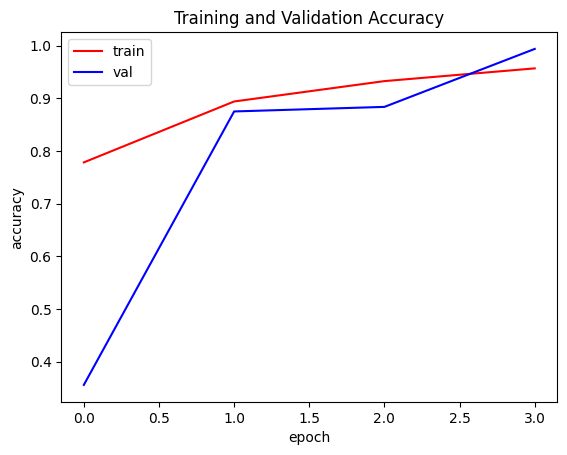

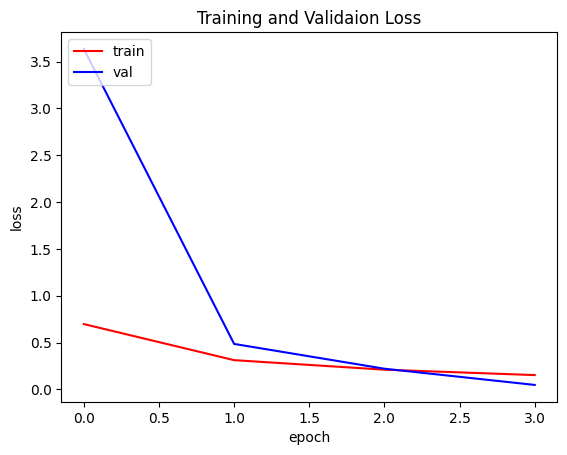

In [10]:
acc = history_7.history['accuracy']
val_acc = history_7.history['val_accuracy']
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

### Caufision Matrix and Clasification Report

The following are the steps in creating a causal matrix and classification report:

- 1. Create a generator that generates test data.
- 2. Use the model.predict_generator method to get predictions from the model against the test data.
- 3. Convert the resulting predictions and labels into a form that meets the needs of the caufion_matrix and classification_report.
- 4. Calculate and display the causal_matrix and classification_report using the function.

In [26]:
# ImageDataGenerator for test set (without augmentation, only normalization)
test_datagen = ImageDataGenerator(rescale=1/255.)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=1,
    target_size=(150,150),
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False
)

Found 3000 images belonging to 3 classes.


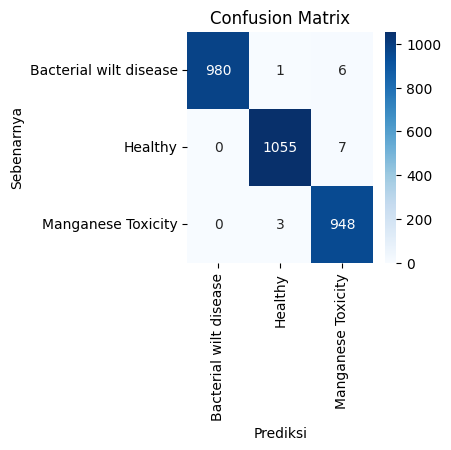

                        precision    recall  f1-score   support

Bacterial wilt disease       1.00      0.99      1.00       987
               Healthy       1.00      0.99      0.99      1062
    Manganese Toxicity       0.99      1.00      0.99       951

              accuracy                           0.99      3000
             macro avg       0.99      0.99      0.99      3000
          weighted avg       0.99      0.99      0.99      3000



In [27]:
test_generator.reset()

preds_7 = model_7.predict(test_generator,verbose=0)
predicted_classes_7 = np.argmax(preds_7, axis=1)
true_classes_7 = test_generator.classes
class_labels_7 = list(test_generator.class_indices.keys())

# Print Confusion Matrix
# Calculate the confusion matrix
cm_7 = confusion_matrix(true_classes_7, predicted_classes_7)

# Create a confusion matrix plot using seaborn
plt.figure(figsize=(len(class_labels_7), len(class_labels_7)))
sns.heatmap(cm_7, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels_7, yticklabels=class_labels_7)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

# Show classification report
print(classification_report(true_classes_7, predicted_classes_7, target_names=class_labels_7))

# Save Model

In [28]:
pip freeze > requirements.txt

In [29]:
model_7.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model_7, export_dir)

In [31]:
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

5619952

In [14]:
# Install tensorflowjs
!pip install tensorflowjs

# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
2024-08-23 02:19:06.509894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 02:19:06.530092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 02:19:06.536234: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to reg